In [0]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import urllib.request
%matplotlib inline
from sklearn import linear_model
import math

In [0]:
#download the dataset from github
#This notebook run directly from Google Colab. no need of any environment setup
url = "https://raw.github.com/mohameddhameem/TimeSeries/master/oil.price.dat.txt"
print ("download start!")
filename, headers = urllib.request.urlretrieve(url, filename="/content/oil.price.dat.txt")
print ("download complete!")
print ("download file location: ", filename)

download start!
download complete!
download file location:  /content/oil.price.dat.txt


In [0]:
df = pd.read_csv('/content/oil.price.dat.txt')
df['date'] = pd.date_range(start='1/1/1986',end='1/1/2006', freq='MS')
df['t'] = pd.RangeIndex(start=1, stop=242, step=1)
df.reset_index(inplace=True)
df.set_index('date', inplace=True)
df.drop(columns=['index'], inplace=True)
#df.head()

#Multiplicative Model

**Model to use data up to Jan 2005 and fit a time series model and perform forecast for next 12 months** 

In [0]:
#Data preparation. we do the split
train = df.iloc[:229,:]
test = df.iloc[229:,:]

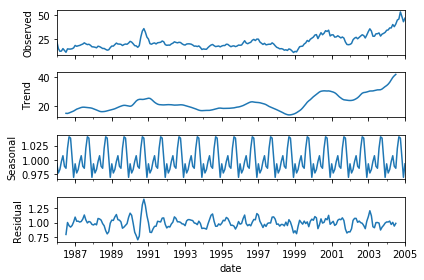

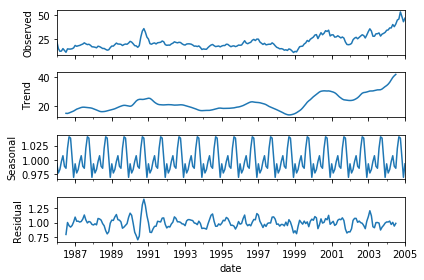

In [0]:
y = train['oil.price'].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition.plot()
#Observe the trend, seasonality and residual

In [0]:
#Extract trend, seasonal and irregular from the decomposition
df_trend = pd.DataFrame(data=decomposition.trend)
df_seasonal = pd.DataFrame(data=decomposition.seasonal)
df_irregular = pd.DataFrame(data=decomposition.resid)
train['trend'] = df_trend['oil.price'].values
train['seasonal'] = df_seasonal['oil.price'].values
train['irregular'] = df_irregular['oil.price'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [0]:
# we will impute the missing value with linear regression.
train['trend'].interpolate(method='linear', inplace=True, limit_direction="both")

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6840: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
#Compute the expected Y
df_trend = pd.DataFrame(data = train.trend)
train['estimatedY']= train['trend'] * train['seasonal']
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(train['oil.price'], train['estimatedY']))
# Explained variance score: 1 is perfect prediction
#compare calcuated oil price with the actual value.
print('Variance score: %.2f' % r2_score(train['oil.price'], train['estimatedY']))
print('RMSE', math.sqrt(mean_squared_error(train['oil.price'], train['estimatedY'])))

Mean squared error: 5.17
Variance score: 0.90
RMSE 2.2745764681701433


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Perform a second fit using data up to July 2005 and perform forecast for next 6 months.**

In [0]:
#Split the train dataset till July 2005
train = df.iloc[:235,:]
test = df.iloc[235:,:]

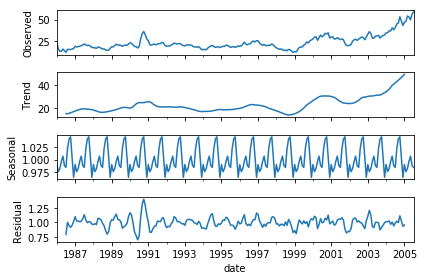

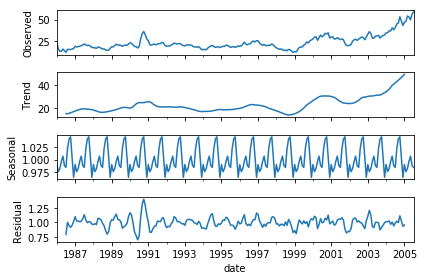

In [0]:
#Lets resample it for Monthly
y = train['oil.price'].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition.plot()

In [0]:
#extract the trend, seasonal and irregular from the time series
df_trend = pd.DataFrame(data=decomposition.trend)
df_seasonal = pd.DataFrame(data=decomposition.seasonal)
df_irregular = pd.DataFrame(data=decomposition.resid)
train['trend'] = df_trend['oil.price'].values
train['seasonal'] = df_seasonal['oil.price'].values
train['irregular'] = df_irregular['oil.price'].values

train['trend'].interpolate(method='linear', inplace=True, limit_direction="both")

df_trend = pd.DataFrame(data = train.trend)
#calcuate the estimated oil price with trend and seasonal
train['estimatedY']= train['trend'] * train['seasonal']
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(train['oil.price'], train['estimatedY']))
# Explained variance score: 1 is perfect prediction
#Calcuate the R2 and RMSE for the actual vs predicted oil price
print('Variance score: %.2f' % r2_score(train['oil.price'], train['estimatedY']))
print('RMSE', math.sqrt(mean_squared_error(train['oil.price'], train['estimatedY'])))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

Mean squared error: 5.37
Variance score: 0.93
RMSE 2.3164153614823992


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6840: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


#Additive Model

**Model to use data up to Jan 2005 and fit a time series model and perform forecast for next 12 months**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Mean squared error: 5.23
Variance score: 0.90
RMSE 2.2862767463236806


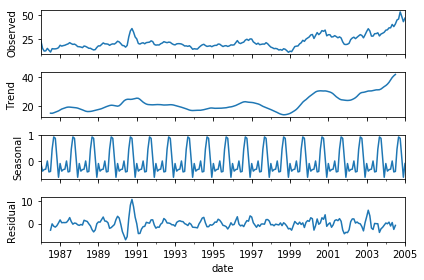

In [0]:
#create train data set till JAn 2005
train = df.iloc[:229,:]
test = df.iloc[229:,:]

y = train['oil.price'].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()

#extract trend , seasonal and residual
df_trend = pd.DataFrame(data=decomposition.trend)
df_seasonal = pd.DataFrame(data=decomposition.seasonal)
df_irregular = pd.DataFrame(data=decomposition.resid)
train['trend'] = df_trend['oil.price'].values
train['seasonal'] = df_seasonal['oil.price'].values
train['irregular'] = df_irregular['oil.price'].values

#Fill the missing value with linear interpolate
train['trend'].interpolate(method='linear', inplace=True, limit_direction="both")

df_trend = pd.DataFrame(data = train.trend)
#calculate estimated Y by adding trend with seasonal
train['estimatedY']= train['trend'] + train['seasonal']
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(train['oil.price'], train['estimatedY']))
# Explained variance score: 1 is perfect prediction
#Calcuate the R2 and RMSE for the actual vs predicted oil price
print('Variance score: %.2f' % r2_score(train['oil.price'], train['estimatedY']))
print('RMSE', math.sqrt(mean_squared_error(train['oil.price'], train['estimatedY'])))

**Perform a second fit using data up to July 2005 and perform forecast for next 6 months.**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Mean squared error: 5.39
Variance score: 0.93
RMSE 2.3224384193737877


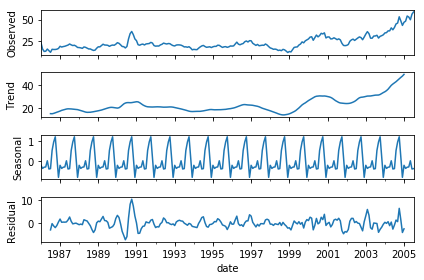

In [0]:
#we do the split
train = df.iloc[:235,:]
test = df.iloc[235:,:]

y = train['oil.price'].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()

df_trend = pd.DataFrame(data=decomposition.trend)
df_seasonal = pd.DataFrame(data=decomposition.seasonal)
df_irregular = pd.DataFrame(data=decomposition.resid)
train['trend'] = df_trend['oil.price'].values
train['seasonal'] = df_seasonal['oil.price'].values
train['irregular'] = df_irregular['oil.price'].values

train['trend'].interpolate(method='linear', inplace=True, limit_direction="both")

df_trend = pd.DataFrame(data = train.trend)
train['estimatedY']= train['trend'] + train['seasonal']
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(train['oil.price'], train['estimatedY']))
# Explained variance score: 1 is perfect prediction
#Calcuate the R2 and RMSE for the actual vs predicted oil price
print('Variance score: %.2f' % r2_score(train['oil.price'], train['estimatedY']))
print('RMSE', math.sqrt(mean_squared_error(train['oil.price'], train['estimatedY'])))

#Train and Fit data from 1-Jan-2000 onwards

##Multiplicative Model
 
**Try to fit a model with the train data from Jan-2000 onwards**


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Mean squared error: 7.80
Variance score: 0.92
RMSE 2.79334698384881


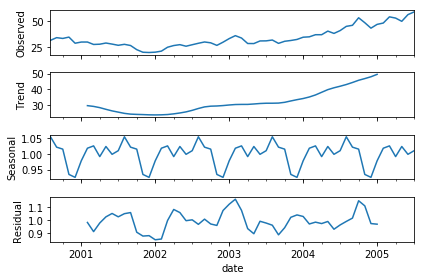

In [0]:
#we do the split
train = df.iloc[173:235,:]
test = df.iloc[235:,:]

y = train['oil.price'].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
decomposition.plot()

df_trend = pd.DataFrame(data=decomposition.trend)
df_seasonal = pd.DataFrame(data=decomposition.seasonal)
df_irregular = pd.DataFrame(data=decomposition.resid)
train['trend'] = df_trend['oil.price'].values
train['seasonal'] = df_seasonal['oil.price'].values
train['irregular'] = df_irregular['oil.price'].values

train['trend'].interpolate(method='linear', inplace=True, limit_direction="both")

df_trend = pd.DataFrame(data = train.trend)
train['estimatedY']= train['trend'] * train['seasonal']
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(train['oil.price'], train['estimatedY']))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train['oil.price'], train['estimatedY']))
print('RMSE', math.sqrt(mean_squared_error(train['oil.price'], train['estimatedY'])))

##Additive Model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Mean squared error: 7.34
Variance score: 0.92
RMSE 2.710143717133451


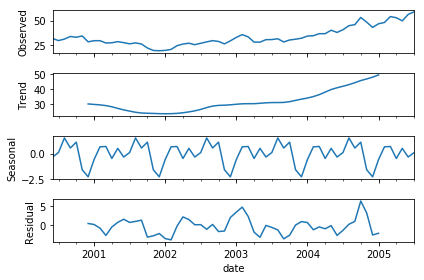

In [0]:
#we do the split
train = df.iloc[173:235,:]
test = df.iloc[235:,:]

y = train['oil.price'].resample('M').sum()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition.plot()

df_trend = pd.DataFrame(data=decomposition.trend)
df_seasonal = pd.DataFrame(data=decomposition.seasonal)
df_irregular = pd.DataFrame(data=decomposition.resid)
train['trend'] = df_trend['oil.price'].values
train['seasonal'] = df_seasonal['oil.price'].values
train['irregular'] = df_irregular['oil.price'].values

train['trend'].interpolate(method='linear', inplace=True, limit_direction="both")

df_trend = pd.DataFrame(data = train.trend)
train['estimatedY']= train['trend'] + train['seasonal']
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(train['oil.price'], train['estimatedY']))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(train['oil.price'], train['estimatedY']))
print('RMSE', math.sqrt(mean_squared_error(train['oil.price'], train['estimatedY'])))